<a href="https://colab.research.google.com/github/Syntax-code/Machine-Learning/blob/master/Creating_a_Bar_Chart_Race_Animation_in_Python_with_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dataset :- https://github.com/dexplo/bar_chart_race/blob/master/data/covid19.csv

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving covid19.txt to covid19.txt
User uploaded file "covid19.txt" with length 6627 bytes


In [2]:
import pandas as pd

read_file = pd.read_csv (r'covid19.txt')
read_file.to_csv (r'covid.csv', index=None)

In [6]:
df = pd.read_csv('covid.csv', index_col='date', parse_dates=['date'])
df.head()

,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
date,,,,,,,,,,,,,,,,,,,,
2020-02-26,NaN,NaN,NaN,2717.0,2.0,NaN,NaN,NaN,19.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-27,NaN,NaN,NaN,2746.0,2.0,NaN,NaN,NaN,26.0,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-28,NaN,NaN,NaN,2790.0,2.0,NaN,NaN,NaN,34.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-29,NaN,NaN,NaN,2837.0,2.0,NaN,NaN,NaN,43.0,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2020-03-01,NaN,NaN,NaN,2872.0,2.0,NaN,NaN,NaN,54.0,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [7]:
df.tail()

,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
date,,,,,,,,,,,,,,,,,,,,
2020-04-18,5453.0,2354.0,1399.0,4636.0,19345.0,4459.0,521.0,535.0,5031.0,571.0,23227.0,546.0,3613.0,687.0,20043.0,1511.0,1368.0,1890.0,38671.0,15498.0
2020-04-19,5683.0,2462.0,1563.0,4636.0,19744.0,4586.0,559.0,582.0,5118.0,610.0,23660.0,650.0,3697.0,714.0,20453.0,1540.0,1393.0,2017.0,40664.0,16095.0
2020-04-20,5828.0,2587.0,1725.0,4636.0,20292.0,4862.0,592.0,590.0,5209.0,687.0,24114.0,686.0,3764.0,735.0,20852.0,1580.0,1429.0,2140.0,42097.0,16550.0
2020-04-21,5998.0,2741.0,1908.0,4636.0,20829.0,5033.0,645.0,616.0,5297.0,730.0,24648.0,712.0,3929.0,762.0,21282.0,1765.0,1478.0,2259.0,44447.0,17378.0
2020-04-22,6262.0,2906.0,2075.0,4636.0,21373.0,5279.0,681.0,635.0,5391.0,769.0,25085.0,857.0,4068.0,785.0,21717.0,1937.0,1509.0,2376.0,46628.0,18151.0


In [8]:
s = df.loc['2020-03-29']
s

Belgium             431.0
Brazil              136.0
Canada               64.0
China              3304.0
France             2611.0
Germany             533.0
India                27.0
Indonesia           114.0
Iran               2640.0
Ireland              46.0
Italy             10779.0
Mexico               16.0
Netherlands         772.0
Portugal            119.0
Spain              6803.0
Sweden              110.0
Switzerland         300.0
Turkey              131.0
USA                2566.0
United Kingdom     1231.0
Name: 2020-03-29 00:00:00, dtype: float64

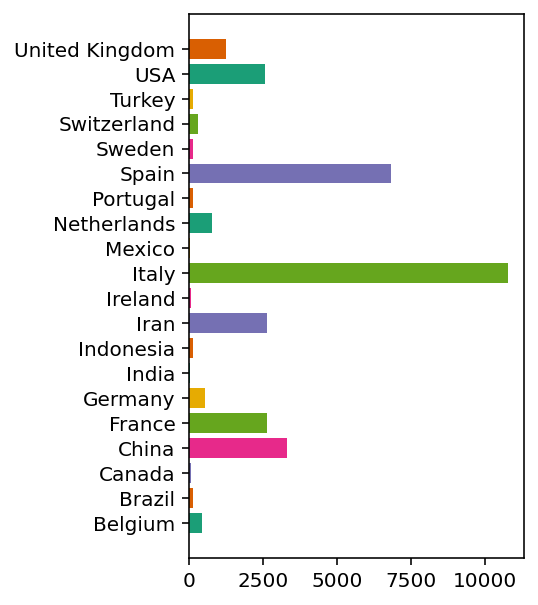

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(3, 5), dpi=144)
colors = plt.cm.Dark2(range(6))
y = s.index
width = s.values
ax.barh(y=y, width=width, color=colors);

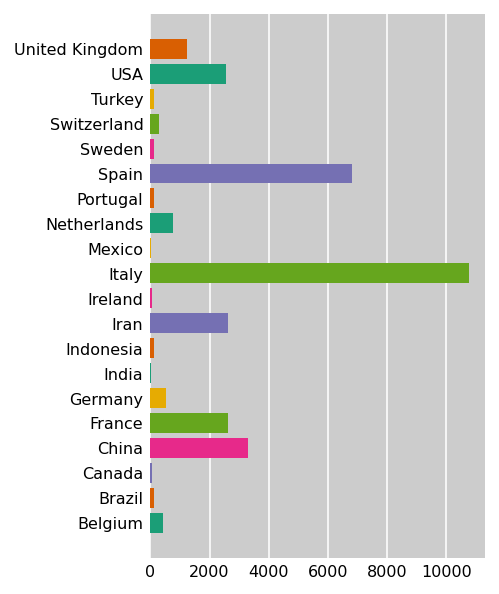

In [13]:
def nice_axes(ax):
    ax.set_facecolor('.8')
    ax.tick_params(labelsize=8, length=0)
    ax.grid(True, axis='x', color='white')
    ax.set_axisbelow(True)
    [spine.set_visible(False) for spine in ax.spines.values()]
    
nice_axes(ax)
fig

Instead of sorting, use the rank method to find the numeric ranking of each country for each day. We use the 'first' method of ranking so that each numeric rank is a unique integer. By default, the method is 'average' which ranks ties with the same value causing overlapping bars. 

In [17]:
df.loc['2020-03-29'].rank(method='first')

Belgium           11.0
Brazil             9.0
Canada             4.0
China             18.0
France            16.0
Germany           12.0
India              2.0
Indonesia          6.0
Iran              17.0
Ireland            3.0
Italy             20.0
Mexico             1.0
Netherlands       13.0
Portugal           7.0
Spain             19.0
Sweden             5.0
Switzerland       10.0
Turkey             8.0
USA               15.0
United Kingdom    14.0
Name: 2020-03-29 00:00:00, dtype: float64

#example for smooth animation

In [18]:
df2 = df.loc['2020-03-29':'2020-03-31']
df2

,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
date,,,,,,,,,,,,,,,,,,,,
2020-03-29,431.0,136.0,64.0,3304.0,2611.0,533.0,27.0,114.0,2640.0,46.0,10779.0,16.0,772.0,119.0,6803.0,110.0,300.0,131.0,2566.0,1231.0
2020-03-30,513.0,159.0,80.0,3308.0,3030.0,645.0,32.0,122.0,2757.0,54.0,11591.0,20.0,865.0,140.0,7716.0,146.0,359.0,168.0,3112.0,1411.0
2020-03-31,705.0,201.0,101.0,3309.0,3532.0,775.0,35.0,136.0,2898.0,71.0,12428.0,28.0,1040.0,160.0,8464.0,180.0,433.0,214.0,4039.0,1793.0


Use the reset_index method to get a default index and to place the dates as a column again.

In [19]:
df2 = df2.reset_index()
df2

,date,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
0,2020-03-29,431.0,136.0,64.0,3304.0,2611.0,533.0,27.0,114.0,2640.0,46.0,10779.0,16.0,772.0,119.0,6803.0,110.0,300.0,131.0,2566.0,1231.0
1,2020-03-30,513.0,159.0,80.0,3308.0,3030.0,645.0,32.0,122.0,2757.0,54.0,11591.0,20.0,865.0,140.0,7716.0,146.0,359.0,168.0,3112.0,1411.0
2,2020-03-31,705.0,201.0,101.0,3309.0,3532.0,775.0,35.0,136.0,2898.0,71.0,12428.0,28.0,1040.0,160.0,8464.0,180.0,433.0,214.0,4039.0,1793.0


In [20]:
df2.index = df2.index * 5
df2

,date,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
0,2020-03-29,431.0,136.0,64.0,3304.0,2611.0,533.0,27.0,114.0,2640.0,46.0,10779.0,16.0,772.0,119.0,6803.0,110.0,300.0,131.0,2566.0,1231.0
5,2020-03-30,513.0,159.0,80.0,3308.0,3030.0,645.0,32.0,122.0,2757.0,54.0,11591.0,20.0,865.0,140.0,7716.0,146.0,359.0,168.0,3112.0,1411.0
10,2020-03-31,705.0,201.0,101.0,3309.0,3532.0,775.0,35.0,136.0,2898.0,71.0,12428.0,28.0,1040.0,160.0,8464.0,180.0,433.0,214.0,4039.0,1793.0


Expand DataFrame with reindex

To insert the additional rows, pass the reindex method a sequence of all integers beginning at 0 to the last integer (10 in this case). pandas inserts new rows of all missing values for every index not in the current DataFrame.

In [21]:
last_idx = df2.index[-1] + 1
df_expanded = df2.reindex(range(last_idx))
df_expanded

,date,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
0,2020-03-29,431.0,136.0,64.0,3304.0,2611.0,533.0,27.0,114.0,2640.0,46.0,10779.0,16.0,772.0,119.0,6803.0,110.0,300.0,131.0,2566.0,1231.0
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-03-30,513.0,159.0,80.0,3308.0,3030.0,645.0,32.0,122.0,2757.0,54.0,11591.0,20.0,865.0,140.0,7716.0,146.0,359.0,168.0,3112.0,1411.0
6,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3> fillna methods

method='ffill': Ffill or forward-fill propagates the last observed non-null value forward until another non-null value is encountered.

method='bfill': Bfill or backward-fill propagates the first observed non-null value backward until another non-null value is met.

In [22]:
df_expanded['date'] = df_expanded['date'].fillna(method='ffill')
df_expanded = df_expanded.set_index('date')
df_expanded

,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
date,,,,,,,,,,,,,,,,,,,,
2020-03-29,431.0,136.0,64.0,3304.0,2611.0,533.0,27.0,114.0,2640.0,46.0,10779.0,16.0,772.0,119.0,6803.0,110.0,300.0,131.0,2566.0,1231.0
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,513.0,159.0,80.0,3308.0,3030.0,645.0,32.0,122.0,2757.0,54.0,11591.0,20.0,865.0,140.0,7716.0,146.0,359.0,168.0,3112.0,1411.0
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_rank_expanded = df_expanded.rank(axis=1, method='first')
df_rank_expanded

,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
date,,,,,,,,,,,,,,,,,,,,
2020-03-29,11.0,9.0,4.0,18.0,16.0,12.0,2.0,6.0,17.0,3.0,20.0,1.0,13.0,7.0,19.0,5.0,10.0,8.0,15.0,14.0
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,11.0,8.0,4.0,18.0,16.0,12.0,2.0,5.0,15.0,3.0,20.0,1.0,13.0,6.0,19.0,7.0,10.0,9.0,17.0,14.0
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3>Linear interpolate missing values

The interpolate method can fill in the missing values in a variety of ways. By default, it uses linear interpolation and works column-wise.

In [24]:
df_expanded = df_expanded.interpolate()
df_expanded

,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
date,,,,,,,,,,,,,,,,,,,,
2020-03-29,431.0,136.0,64.0,3304.0,2611.0,533.0,27.0,114.0,2640.0,46.0,10779.0,16.0,772.0,119.0,6803.0,110.0,300.0,131.0,2566.0,1231.0
2020-03-29,447.4,140.6,67.2,3304.8,2694.8,555.4,28.0,115.6,2663.4,47.6,10941.4,16.8,790.6,123.2,6985.6,117.2,311.8,138.4,2675.2,1267.0
2020-03-29,463.8,145.2,70.4,3305.6,2778.6,577.8,29.0,117.2,2686.8,49.2,11103.8,17.6,809.2,127.4,7168.2,124.4,323.6,145.8,2784.4,1303.0
2020-03-29,480.2,149.8,73.6,3306.4,2862.4,600.2,30.0,118.8,2710.2,50.8,11266.2,18.4,827.8,131.6,7350.8,131.6,335.4,153.2,2893.6,1339.0
2020-03-29,496.6,154.4,76.8,3307.2,2946.2,622.6,31.0,120.4,2733.6,52.4,11428.6,19.2,846.4,135.8,7533.4,138.8,347.2,160.6,3002.8,1375.0
2020-03-30,513.0,159.0,80.0,3308.0,3030.0,645.0,32.0,122.0,2757.0,54.0,11591.0,20.0,865.0,140.0,7716.0,146.0,359.0,168.0,3112.0,1411.0
2020-03-30,551.4,167.4,84.2,3308.2,3130.4,671.0,32.6,124.8,2785.2,57.4,11758.4,21.6,900.0,144.0,7865.6,152.8,373.8,177.2,3297.4,1487.4
2020-03-30,589.8,175.8,88.4,3308.4,3230.8,697.0,33.2,127.6,2813.4,60.8,11925.8,23.2,935.0,148.0,8015.2,159.6,388.6,186.4,3482.8,1563.8
2020-03-30,628.2,184.2,92.6,3308.6,3331.2,723.0,33.8,130.4,2841.6,64.2,12093.2,24.8,970.0,152.0,8164.8,166.4,403.4,195.6,3668.2,1640.2


In [25]:
df_rank_expanded = df_rank_expanded.interpolate()
df_rank_expanded

,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
date,,,,,,,,,,,,,,,,,,,,
2020-03-29,11.0,9.0,4.0,18.0,16.0,12.0,2.0,6.0,17.0,3.0,20.0,1.0,13.0,7.0,19.0,5.0,10.0,8.0,15.0,14.0
2020-03-29,11.0,8.8,4.0,18.0,16.0,12.0,2.0,5.8,16.6,3.0,20.0,1.0,13.0,6.8,19.0,5.4,10.0,8.2,15.4,14.0
2020-03-29,11.0,8.6,4.0,18.0,16.0,12.0,2.0,5.6,16.2,3.0,20.0,1.0,13.0,6.6,19.0,5.8,10.0,8.4,15.8,14.0
2020-03-29,11.0,8.4,4.0,18.0,16.0,12.0,2.0,5.4,15.8,3.0,20.0,1.0,13.0,6.4,19.0,6.2,10.0,8.6,16.2,14.0
2020-03-29,11.0,8.2,4.0,18.0,16.0,12.0,2.0,5.2,15.4,3.0,20.0,1.0,13.0,6.2,19.0,6.6,10.0,8.8,16.6,14.0
2020-03-30,11.0,8.0,4.0,18.0,16.0,12.0,2.0,5.0,15.0,3.0,20.0,1.0,13.0,6.0,19.0,7.0,10.0,9.0,17.0,14.0
2020-03-30,11.0,8.0,4.0,17.6,16.2,12.0,2.0,5.0,15.0,3.0,20.0,1.0,13.0,6.0,19.0,7.0,10.0,9.0,17.2,14.0
2020-03-30,11.0,8.0,4.0,17.2,16.4,12.0,2.0,5.0,15.0,3.0,20.0,1.0,13.0,6.0,19.0,7.0,10.0,9.0,17.4,14.0
2020-03-30,11.0,8.0,4.0,16.8,16.6,12.0,2.0,5.0,15.0,3.0,20.0,1.0,13.0,6.0,19.0,7.0,10.0,9.0,17.6,14.0


 # Function to prepare all of the data

In [26]:
def prepare_data(df, steps=5):
    df = df.reset_index()
    df.index = df.index * steps
    last_idx = df.index[-1] + 1
    df_expanded = df.reindex(range(last_idx))
    df_expanded['date'] = df_expanded['date'].fillna(method='ffill')
    df_expanded = df_expanded.set_index('date')
    df_rank_expanded = df_expanded.rank(axis=1, method='first')
    df_expanded = df_expanded.interpolate()
    df_rank_expanded = df_rank_expanded.interpolate()
    return df_expanded, df_rank_expanded

df_expanded, df_rank_expanded = prepare_data(df)
df_expanded.head()

,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
date,,,,,,,,,,,,,,,,,,,,
2020-02-26,NaN,NaN,NaN,2717.0,2.0,NaN,NaN,NaN,19.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,2722.8,2.0,NaN,NaN,NaN,20.4,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,2728.6,2.0,NaN,NaN,NaN,21.8,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,2734.4,2.0,NaN,NaN,NaN,23.2,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,2740.2,2.0,NaN,NaN,NaN,24.6,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_rank_expanded.head()

,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
date,,,,,,,,,,,,,,,,,,,,
2020-02-26,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
from matplotlib.animation import FuncAnimation

def init():
    ax.clear()
    nice_axes(ax)
    ax.set_ylim(.2, 6.8)

def update(i):
    labels = df_expanded.columns
    for bar in ax.containers:
        bar.remove()
    y = df_rank_expanded.iloc[i]
    width = df_expanded.iloc[i]
    ax.barh(y=y, width=width, color=colors, tick_label=labels)
    date_str = df_expanded.index[i].strftime('%B %-d, %Y')
    ax.set_title(f'COVID-19 Deaths by Country - {date_str}', fontsize='smaller')
    
fig = plt.Figure(figsize=(4, 2.5), dpi=144)
ax = fig.add_subplot()
anim = FuncAnimation(fig=fig, func=update, init_func=init, frames=len(df_expanded), 
                     interval=100, repeat=False)

In [37]:
from IPython.display import HTML
html = anim.to_html5_video()
HTML(html)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

In [38]:
anim.save('covid19.mp4')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

In [31]:
!pip install bar_chart_race

     |████████████████████████████████| 163kB 2.9MB/s 


In [32]:
import bar_chart_race as bcr
html = bcr.bar_chart_race(df, figsize=(4, 2.5), title='COVID-19 Deaths by Country')
HTML(html)

TypeError: ignored